# Yelp Dataset Challenge

![Yelp Data Challenge](https://s3-media3.fl.yelpcdn.com/assets/srv0/engineering_pages/6d323fc75cb1/assets/img/dataset/960x225_dataset@2x.png)

## Load Data

Use the processed data `last_2_years_restaurant_reviews.csv`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('last_2_years_restaurant_reviews.csv')

In [3]:
# Inspect
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398037 entries, 0 to 398036
Data columns (total 12 columns):
business_id    398037 non-null object
name           398037 non-null object
categories     398037 non-null object
avg_stars      398037 non-null float64
cool           398037 non-null int64
date           398037 non-null object
funny          398037 non-null int64
review_id      398037 non-null object
stars          398037 non-null int64
text           398037 non-null object
useful         398037 non-null int64
user_id        398037 non-null object
dtypes: float64(1), int64(4), object(7)
memory usage: 36.4+ MB


In [4]:
df.head()

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,kgffcoxT6BQp-gJ-UQ7Czw,Subway,"Fast Food, Restaurants, Sandwiches",2.5,0,2016-07-03,0,c6iTbCMMYWnOd79ZiWwobg,1,"I ordered a few 12 inch sandwiches , a turkey ...",1,ih7Dmu7wZpKVwlBRbakJOQ
1,kgffcoxT6BQp-gJ-UQ7Czw,Subway,"Fast Food, Restaurants, Sandwiches",2.5,0,2018-03-10,0,5iDdZvpK4jOv2w5kZ15TUA,1,Worst subway of any I have visited. I have man...,1,m3WBc9bGxn1q1ikAFq8PaA
2,kgffcoxT6BQp-gJ-UQ7Czw,Subway,"Fast Food, Restaurants, Sandwiches",2.5,0,2016-12-26,0,oCUrLS4T-paZBr6WnrXg_A,2,Good luck trying to get the order right. The c...,0,H7bJDtGzhdg1fsmBL4KZWg
3,kgffcoxT6BQp-gJ-UQ7Czw,Subway,"Fast Food, Restaurants, Sandwiches",2.5,0,2016-12-16,0,qXHvWYgL-8yfcGvP_ydKGA,2,Here to get my pick up order at the moment it ...,0,58sXi_0oTgVlM3aUuFYHUA
4,0jtRI7hVMpQHpUVtUy4ITw,Omelet House Summerlin,"Beer, Wine & Spirits, Italian, Food, American ...",4.0,1,2016-12-29,0,j9l7IMJX9bvWjkJ18EWGpg,5,"My husband & I were visiting the area, found t...",0,ZS7V0uC4kVrJR_4Yi3oTHA


## 1. Cluster the review text data for all the restaurants

### Define feature variables
* Use `text` of review as predictor and `avg_stars` as target

In [5]:
# Take the values of the column that contains review text data, save to a variable named "documents"
documents = df['text']
# Make a column and take the values, save to a variable named "target"
# df['favorable'] = df['stars'] > 4
# target = df['favorable']
stars = df['avg_stars']

In [6]:
documents.shape

(398037,)

In [7]:
stars.shape

(398037,)

In [8]:
documents.head(3)

0    I ordered a few 12 inch sandwiches , a turkey ...
1    Worst subway of any I have visited. I have man...
2    Good luck trying to get the order right. The c...
Name: text, dtype: object

In [9]:
stars.mean()

3.8557659212585764

### Create training and test dataset
Use larger test size to aviod crash when training

In [10]:
from sklearn.model_selection import train_test_split
X = documents.values
y = stars.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

### Get NLP representation of the documents

#### Fit `TfidfVectorizer` with training data only, then tranform all the data to tf-idf

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
# Create TfidfVectorizer, and name it vectorizer, choose a reasonable max_features, e.g. 1000
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

In [13]:
# Train the model with training data
vec_trained = vectorizer.fit_transform(X_train)# vec_trained 是存了 tf-idf 的矩陣

In [14]:
print(type(vec_trained)) # it is a sparse matrix in compressed sparse row (csr) format
# print(vec_trained)
# print(vec_trained.toarray())
# print(vec_trained.todense())

<class 'scipy.sparse.csr.csr_matrix'>


In [15]:
vec_arr = vec_trained.toarray() # This is an array
vec_den = vec_trained.todense() # This is an matrix
print(type(vec_arr), type(vec_den))
print(vec_arr)
print(vec_den)

<class 'numpy.ndarray'> <class 'numpy.matrixlib.defmatrix.matrix'>
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [16]:
vec_trained = vec_trained.toarray() # 最後採用 array 的形式，因為 sklearn 的模型要吃 ndarray 

In [17]:
vec_trained.shape # 199018 x 1000: 398037 筆資料 * 0.5 當 train = 199018.5, 1000 個單詞

(199018, 1000)

In [18]:
# Get the vocab of your tfidf
vocab = vectorizer.get_feature_names() # features 就是單字

In [19]:
# vocab

In [20]:
print(type(vocab))
print(len(vocab)) # 1000 個單詞

<class 'list'>
1000


In [21]:
# Use the trained model to transform all the reviews
vec_documents = vectorizer.transform(documents) # 把整個 documents 拿來求 tf-idf 的矩陣並存到 vec_documents

In [22]:
print(type(vec_documents)) # sparse matrix in csr format
vec_doc_arr = vec_documents.toarray() # use ndarray
print(vec_doc_arr)
print(vec_doc_arr.shape)

<class 'scipy.sparse.csr.csr_matrix'>
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(398037, 1000)


### Cluster reviews with KMeans

#### Fit k-means clustering with the training vectors and apply it on all the data

In [23]:
from sklearn.cluster import KMeans

In [24]:
kmeans = KMeans().fit(vec_trained)

In [25]:
print(kmeans.labels_.size)
kmeans.labels_ # 每一列是屬於哪個 cluster

199018


array([1, 0, 7, ..., 6, 6, 1], dtype=int32)

In [26]:
np.unique(kmeans.labels_) # 有 8 個 clusters

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32)

In [27]:
kmeans.cluster_centers_ # 是 8 x 1000 的維度

array([[0.00414732, 0.02106461, 0.00275894, ..., 0.00400914, 0.00071464,
        0.00147752],
       [0.00284556, 0.00664583, 0.00244654, ..., 0.00130787, 0.00386807,
        0.00795231],
       [0.00252771, 0.00831588, 0.00143249, ..., 0.0013526 , 0.00487588,
        0.00830531],
       ...,
       [0.00160846, 0.00533365, 0.00155053, ..., 0.00107911, 0.00253724,
        0.00540751],
       [0.00077492, 0.00386826, 0.00131025, ..., 0.00112075, 0.00231777,
        0.00632524],
       [0.00171322, 0.00650178, 0.00245981, ..., 0.00096125, 0.00275085,
        0.00706843]])

In [28]:
print(kmeans.labels_.shape)
print(kmeans.cluster_centers_.shape) # there are 8 clusters and 1000 words

(199018,)
(8, 1000)


#### Make predictions on all your data

In [29]:
doc_cluster = kmeans.predict(vec_doc_arr) # assign all documents to correct clusters

#### Inspect the centroids

`kmeans.cluster_centers_` 是每一個 cluster center 的 tf-idf 形成的 ndarray，每一個欄位代表對應的單詞 (feature)

In [30]:
kmeans.cluster_centers_

array([[0.00414732, 0.02106461, 0.00275894, ..., 0.00400914, 0.00071464,
        0.00147752],
       [0.00284556, 0.00664583, 0.00244654, ..., 0.00130787, 0.00386807,
        0.00795231],
       [0.00252771, 0.00831588, 0.00143249, ..., 0.0013526 , 0.00487588,
        0.00830531],
       ...,
       [0.00160846, 0.00533365, 0.00155053, ..., 0.00107911, 0.00253724,
        0.00540751],
       [0.00077492, 0.00386826, 0.00131025, ..., 0.00112075, 0.00231777,
        0.00632524],
       [0.00171322, 0.00650178, 0.00245981, ..., 0.00096125, 0.00275085,
        0.00706843]])

In [31]:
kmeans.cluster_centers_.shape

(8, 1000)

#### Find the top 10 features for each cluster.

要選出 cluster center 中每一列 tf-idf 最大的前十個欄位，在找出該欄位對應的單詞是哪個

`np.argsort()` 預設會對列排序，由左到右表示由小到大，但是傳回的是對應於原本的 ndarray 的元素的 index

array([3, 1, 2]) 由小到大排序會是 array([1, 2, 3]) 對應原本的 ndarray 的元素的 index 就是 [1, 2, 0]

見 https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.argsort.html


In [32]:
print(type(kmeans.cluster_centers_))

<class 'numpy.ndarray'>


In [33]:
sorted_index_centroids = np.argsort(kmeans.cluster_centers_)
print(sorted_index_centroids) # 每一列的倒數十個數字，是 tf-idf 最大的欄位的 index

[[ 22 199 203 ... 540 327 597]
 [538  46 642 ... 223 327 641]
 [836  54  76 ... 365 337 150]
 ...
 [270 293 642 ... 694 327 365]
 [984 795 243 ... 774 327 373]
 [374 944 159 ... 727 641 857]]


In [34]:
top_ten = sorted_index_centroids[:, -10:] # 取屁股後面十個
print(top_ten) # 由左到右是從第十名到第一名

[[230 733  40 124 450 774 887 540 327 597]
 [913 887 503  27 598 450 478 223 327 641]
 [223 746 373 641 598 720 327 365 337 150]
 [373 887 774  27 932 641 327 465 934  79]
 [450 598 597 794 145 373 641 365 203 639]
 [450 373 478 669 564 774 641 694 327 365]
 [222  43 824  52 339  27 641 774 327 373]
 [321 774 335 365 373  54 726 727 641 857]]


In [35]:
top_ten = top_ten[:, ::-1] # 改變排名的順序，從左到右由第一名排到第十名
print(top_ten)

[[597 327 540 887 774 450 124  40 733 230]
 [641 327 223 478 450 598  27 503 887 913]
 [150 337 365 327 720 598 641 373 746 223]
 [ 79 934 465 327 641 932  27 774 887 373]
 [639 203 365 641 373 145 794 597 598 450]
 [365 327 694 641 774 564 669 478 373 450]
 [373 327 774 641  27 339  52 824  43 222]
 [857 641 727 726  54 373 365 335 774 321]]


In [36]:
print(sorted_index_centroids[:, -1:-10:-1]) # 用一行解決

[[597 327 540 887 774 450 124  40 733]
 [641 327 223 478 450 598  27 503 887]
 [150 337 365 327 720 598 641 373 746]
 [ 79 934 465 327 641 932  27 774 887]
 [639 203 365 641 373 145 794 597 598]
 [365 327 694 641 774 564 669 478 373]
 [373 327 774 641  27 339  52 824  43]
 [857 641 727 726  54 373 365 335 774]]


然後去 vocab 中找欄位 index 對應的單字

In [37]:
# print(vocab[639])
for i, row in enumerate(top_ten):
#     print(i, row)
    print('%d: %s' % (i, ', '.join([vocab[j] for j in row])))

0: order, food, minutes, time, service, just, came, asked, said, didn
1: place, food, delicious, like, just, ordered, amazing, love, time, try
2: chicken, fried, good, food, rice, ordered, place, great, sauce, delicious
3: best, vegas, las, food, place, ve, amazing, service, time, great
4: pizza, crust, good, place, great, cheese, slice, order, ordered, just
5: good, food, really, place, service, nice, pretty, like, great, just
6: great, food, service, place, amazing, friendly, awesome, staff, atmosphere, definitely
7: sushi, place, rolls, roll, ayce, great, good, fresh, service, fish


#### Try different k

Wrap up above steps into a function

In [38]:
def top_ten_words(training_data, n):
    kmeans = KMeans(n_clusters=n, random_state=0)
    kmeans.fit(training_data)
    index_array = kmeans.cluster_centers_.argsort()[:, -1:-10:-1]
    print('Top 10 features for each cluster:')
    for i, row in enumerate(index_array):
        print('{}: {}'.format(i, ', '.join([vocab[i] for i in row])))

In [39]:
# 6 clusters
top_ten_words(vec_trained, 6)

Top 10 features for each cluster:
0: good, chicken, food, really, ordered, like, place, just, burger
1: food, place, best, vegas, amazing, service, love, delicious, good
2: sushi, place, rolls, roll, ayce, great, good, service, fresh
3: food, order, time, just, service, minutes, came, like, didn
4: pizza, crust, good, place, great, cheese, slice, order, best
5: great, food, service, place, good, amazing, friendly, staff, atmosphere


In [40]:
# 4 clusters
top_ten_words(vec_trained, 4)

Top 10 features for each cluster:
0: pizza, good, crust, place, great, cheese, slice, order, best
1: great, food, service, place, amazing, good, friendly, staff, definitely
2: good, place, food, chicken, best, vegas, delicious, like, really
3: food, order, time, just, service, minutes, like, came, didn


#### Print out the rating and review of a random sample of the reviews assigned to each cluster to get a sense of the cluster.

In [41]:
print(doc_cluster.shape)
print(doc_cluster) # 每一個列屬於哪一個 cluster
print(np.unique(doc_cluster)) # 共有 8 個 cluster，從編號 0 到 7

(398037,)
[1 1 0 ... 5 3 0]
[0 1 2 3 4 5 6 7]


In [42]:
print(vec_doc_arr.shape)
cluster = np.arange(0, vec_doc_arr.shape[0])
print(cluster)
print([doc_cluster==1])
print(cluster[doc_cluster==1])

(398037, 1000)
[     0      1      2 ... 398034 398035 398036]
[array([ True,  True, False, ..., False, False, False])]
[     0      1      4 ... 398030 398032 398033]


In [43]:
for i in range(kmeans.n_clusters):
    records = np.arange(0, vec_doc_arr.shape[0]) # 產生全部的列的數目
    records = records[doc_cluster == i] # 加入 mask 挑出屬於第 i 個 cluster 的那一列
    random_reviews = np.random.choice(records, 2, replace=False) # randomly pick 2 indeces
#     print(random_reviews)
    print('Cluster {}:'.format(i))
    for review in random_reviews:
        star = df.iloc[review].loc['stars']
        text = df.iloc[review].loc['text']
        print('Stars={}: {}\n'.format(star, text))
    print('='* 20)

Cluster 0:
Stars=5: I have to give this place 5 stars! I dropped by a week before my visit to make sure I could use some really old gift certificates. The manager was very helpful, and said he would honor them, and gave me his card to make sure I could use them if he wasn't around. It's a shame that I didn't write down his name. 

I decided to eat there yesterday, with a friend, but it was more crowded than I expected for a Wednesday. I was told it was about a 25 minute wait, but it was really only about 15 minutes. The hosts and staff were very friendly, even though there was a crowd of customers waiting around. We were seated in a booth close to the kitchen, and if I have to think of any negative, it's that those booths were very dark, so it was hard to read the menu. That isn't enough to remove a star, though. Our server, Shawn was just awesome! He was the perfect combination of friendly and professional. I would recommend you sit at his table! I ordered the Chicken Madeira/Steak Di

## 2. Cluster all the reviews of the most reviewed restaurant

A review is a record in the dataframe. Each record is index by `business_id`. Find the highest number of count of `business_id` to get the most review restaurant

In [44]:
df['business_id'].value_counts() # 遞減排列

RESDUcs7fIiihp38-d6_6g    2895
4JNXUYY8wbaaDmk3BPzlWw    1994
faPVqws-x-5k2CQKDNtHxw    1961
f4x1YBxkLrZg652xt2KR5g    1960
QXV3L_QFGj8r6nWX2kS2hA    1633
K7lWdNUhCbcnEvI0NhGewg    1628
77h11eWv6HKJAgojLx8G4w    1500
RwMLuOkImBIqqYj4SSKSPg    1443
IWN2heYitkg-D4UdqfxcMA    1409
xfWdUmrz2ha3rcigyITV0g    1396
hihud--QRriCYZw1zZvW4g    1344
HhVmDybpU7L50Kb5A0jXTg    1267
mU3vlAVzTxgmZUu6F4XixA    1239
ysv6yhVYOoH9Pf7PlMyD0g    1224
mDR12Hafvr84ctpsV6YLag    1204
iCQpiavjjPzJ5_3gPD5Ebg    1164
vHz2RLtfUMVRPFmd7VBEHA    1138
OETh78qcgDltvHULowwhJg    1089
3kdSl5mo9dWC4clrQjEDGg    1075
YJ8ljUhLsz6CtT_2ORNFmg    1065
0d0i0FaJq1GIeW1rS2D-5w    1064
El4FC8jcawUVgw_0EIcbaQ    1053
QJatAcxYgK1Zp9BRZMAx7g    1046
cYwJA2A6I12KNkm2rtXd5g    1039
XXW_OFaYQkkGOGniujZFHg    1037
igHYkXZMLAc9UdV5VnR_AA    1015
q3oJ6bNRV3OoJrwc95GOwg     990
3BCsAgo_1i4xMuTyLKMLRQ     951
KskYqH1Bi7Z_61pH6Om8pg     940
CVKOPzBVOj3_apFUmZ9ZWw     937
                          ... 
klddGAcNIpE_aB5sd1hNXw       1
jBAxyzIJ

In [45]:
df['business_id'].value_counts().index[0]

'RESDUcs7fIiihp38-d6_6g'

In [46]:
most_reviewed_restaurand_id = df['business_id'].value_counts().index[0]
print(most_reviewed_restaurand_id) # 確認一下

most_reviewed = (df['business_id'] == most_reviewed_restaurand_id)

RESDUcs7fIiihp38-d6_6g


In [47]:
# Find the business who got most reviews, get your filtered df, name it df_top_restaurant
df_top_restaurant = df[most_reviewed].copy() # duplicate dataframe so we don't change the original dataframe

In [48]:
df_top_restaurant.head()

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
382207,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"Sandwiches, Buffets, Breakfast & Brunch, Food,...",4.0,0,2017-09-09,0,mQfl6ci46mu0xaZrkRUhlA,5,"This buffet is amazing. Yes, it is expensive,...",0,f638AHA_GoHbyDB7VFMz7A
382208,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"Sandwiches, Buffets, Breakfast & Brunch, Food,...",4.0,0,2017-02-08,0,lMarDJDg4-e_0YoJOKJoWA,2,This place....lol our server was nice. But fo...,0,A21zMqdN76ueLZFpmbue0Q
382209,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"Sandwiches, Buffets, Breakfast & Brunch, Food,...",4.0,0,2017-12-22,0,30xmXTzJwHPcqt0uvSLQhQ,3,One star knocked off for the cold air conditio...,0,uNHEnP28MMmVy96ZSJKaMA
382210,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"Sandwiches, Buffets, Breakfast & Brunch, Food,...",4.0,0,2017-09-22,0,SOUuNn4f1fHKxFHntYzonw,3,Was torn between 2 and 3. Caught the last of ...,0,WvVqnHU_eVBUfL-CI9efdw
382211,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"Sandwiches, Buffets, Breakfast & Brunch, Food,...",4.0,0,2016-12-14,0,1mAf8vTO6TGTrQ3WSfTB3g,4,This place was one of those once in a lifetime...,0,aYLS5lhdCp5HSPOtkMvapw


In [49]:
df_top_restaurant = df_top_restaurant.reset_index() # keep original index
df_top_restaurant.head()

,index,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,382207,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"Sandwiches, Buffets, Breakfast & Brunch, Food,...",4.0,0,2017-09-09,0,mQfl6ci46mu0xaZrkRUhlA,5,"This buffet is amazing. Yes, it is expensive,...",0,f638AHA_GoHbyDB7VFMz7A
1,382208,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"Sandwiches, Buffets, Breakfast & Brunch, Food,...",4.0,0,2017-02-08,0,lMarDJDg4-e_0YoJOKJoWA,2,This place....lol our server was nice. But fo...,0,A21zMqdN76ueLZFpmbue0Q
2,382209,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"Sandwiches, Buffets, Breakfast & Brunch, Food,...",4.0,0,2017-12-22,0,30xmXTzJwHPcqt0uvSLQhQ,3,One star knocked off for the cold air conditio...,0,uNHEnP28MMmVy96ZSJKaMA
3,382210,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"Sandwiches, Buffets, Breakfast & Brunch, Food,...",4.0,0,2017-09-22,0,SOUuNn4f1fHKxFHntYzonw,3,Was torn between 2 and 3. Caught the last of ...,0,WvVqnHU_eVBUfL-CI9efdw
4,382211,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"Sandwiches, Buffets, Breakfast & Brunch, Food,...",4.0,0,2016-12-14,0,1mAf8vTO6TGTrQ3WSfTB3g,4,This place was one of those once in a lifetime...,0,aYLS5lhdCp5HSPOtkMvapw


In [50]:
# Load business dataset (optional)
import json

# Loading a single file works, wrap in function
def read_json_file(input_file):
    with open(input_file) as fin:
        df = pd.DataFrame(json.loads(line) for line in fin)
    return df

In [51]:
df_business = read_json_file('yelp_academic_dataset_business.json')
# df_review = read_json_file('yelp_academic_dataset_business.json')

In [52]:
# Take a look at the most reviewed restaurant's profile (optional)
df_business[df_business['business_id'] ==  most_reviewed_restaurand_id]

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
185167,3570 S Las Vegas Blvd,"{'Alcohol': 'full_bar', 'Ambience': '{'romanti...",RESDUcs7fIiihp38-d6_6g,"Sandwiches, Buffets, Breakfast & Brunch, Food,...",Las Vegas,"{'Monday': '7:30-22:0', 'Tuesday': '7:30-22:0'...",1,36.116113,-115.176222,Bacchanal Buffet,The Strip,89109,7866,4.0,NV


In [53]:
address = df_business[df_business['business_id'] ==  most_reviewed_restaurand_id]['address']
attributes = df_business[df_business['business_id'] ==  most_reviewed_restaurand_id]['attributes']
category = df_business[df_business['business_id'] ==  most_reviewed_restaurand_id]['categories']
hours = df_business[df_business['business_id'] ==  most_reviewed_restaurand_id]['hours']

In [54]:
print(address.values)
print(attributes.values)
print(category.values)
print(hours.values)

['3570 S Las Vegas Blvd']
[{'Alcohol': 'full_bar', 'Ambience': "{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'divey': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': True}", 'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': "{'garage': True, 'street': False, 'validated': False, 'lot': False, 'valet': True}", 'Caters': 'False', 'GoodForKids': 'True', 'GoodForMeal': "{'dessert': True, 'latenight': False, 'lunch': True, 'dinner': True, 'breakfast': False, 'brunch': True}", 'HasTV': 'False', 'NoiseLevel': 'average', 'OutdoorSeating': 'False', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery': 'False', 'RestaurantsGoodForGroups': 'True', 'RestaurantsPriceRange2': '3', 'RestaurantsReservations': 'False', 'RestaurantsTableService': 'True', 'RestaurantsTakeOut': 'False', 'WheelchairAccessible': 'True', 'WiFi': 'no'}]
['Sandwiches, Buffets, Breakfast & Brunch, Food, Restaurants']
[{'Monday': '7:30-22:0', 'Tues

### Vectorize the text feature

In [55]:
# Take the values of the column that contains review text data, save to a variable named "documents_top_restaurant"
documents_top_restaurant = df_top_restaurant['text']

In [56]:
documents_top_restaurant.shape

(2895,)

In [57]:
documents_top_restaurant[:3].values # show first 3 reviews

array(["This buffet is amazing.  Yes, it is expensive, but it is worth the splurge.  I recommend that you look at everything first and then decide what to get, because you can't possibly try everything.  I missed an entire corner of great food that I didn't see at first, and then I was too full to eat more. I like how everything is on little plates, bowls, or baskets, so everything doesn't get mixed together.  Lines are long, but you can check in and then they text when your time is almost up.  The wait time was less than they had said it would be, so don't go far away to wait.",
       'This place....lol our server was nice.  But for 50 something dollars for dinner was not worth it....Sorry but if I could choose another place to spend that much I know I would have been much happier. Not to mention they took a photo of us when we came in then brought us like 3-4 printouts of them, I mean nice ones...then they told us it was 15 dollars for one of the pictures...we honestly thought out o

### Define your target variable (for later classification use)

#### Again, we look at perfect (5 stars) and imperfect (1-4 stars) rating

In [58]:
df_top_restaurant['perfect'] = (df_top_restaurant['stars'] > 4)
df_top_restaurant['perfect'].head(10) # show first 10 rows

0     True
1    False
2    False
3    False
4    False
5    False
6    False
7     True
8    False
9    False
Name: perfect, dtype: bool

In [59]:
df_top_restaurant.shape

(2895, 14)

In [60]:
target_top_restaurant = df_top_restaurant['perfect'].values.astype(int)
target_top_restaurant

array([1, 0, 0, ..., 0, 0, 1])

In [61]:
target_top_restaurant.shape

(2895,)

#### Check the statistic of the target variable

In [62]:
target_top_restaurant.mean()

0.3727115716753022

### Create training dataset and test dataset

In [63]:
X = documents_top_restaurant.values
y = target_top_restaurant # 已經是 ndarray 了
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [64]:
print(documents_top_restaurant.shape)
print(documents_top_restaurant.shape[0] * 0.7)
print(documents_top_restaurant.shape[0] * 0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2895,)
2026.4999999999998
868.5
(2026,) (869,) (2026,) (869,)


### Get NLP representation of the documents

In [65]:
# Create TfidfVectorizer, and name it vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

In [66]:
# Train the model with your training data
vec_train = vectorizer.fit_transform(X_train)

In [67]:
# Get the vocab of your tfidf
words = vectorizer.get_feature_names()

In [68]:
# Use the trained model to transform the test data
vec_test = vectorizer.transform(X_test)

In [69]:
# Use the trained model to transform all the data
vec_documents = vectorizer.transform(X)

In [70]:
print(vec_train.shape, vec_test.shape, vec_documents.shape)
print(len(words))

(2026, 1000) (869, 1000) (2895, 1000)
1000


### Cluster reviews with KMeans

#### Fit k-means clustering on the training vectors and make predictions on all data

In [71]:
kmeans = KMeans(n_clusters=5) # use 5 clusters because there 5 categories of stars
kmeans.fit(vec_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

#### Make predictions on all your data

In [72]:
all_doc_clusters = kmeans.predict(vec_documents)

In [73]:
print(all_doc_clusters.shape)
all_doc_clusters

(2895,)


array([2, 1, 1, ..., 3, 1, 0], dtype=int32)

In [74]:
all_doc_clusters[:10] # show the cluster of the first 10 rows

array([2, 1, 1, 1, 3, 2, 4, 3, 2, 2], dtype=int32)

In [75]:
df_top_restaurant.iloc[:10]['stars'] # 把星級評等和 clusters 的結果比較一下

0    5
1    2
2    3
3    3
4    4
5    1
6    1
7    5
8    1
9    4
Name: stars, dtype: int64

#### Inspect the centroids

In [76]:
print(kmeans.cluster_centers_.shape)
kmeans.cluster_centers_

(5, 1000)


array([[0.        , 0.00346778, 0.00405817, ..., 0.0054002 , 0.00203145,
        0.00327582],
       [0.00442716, 0.00849826, 0.00309217, ..., 0.00519002, 0.00096428,
        0.00189797],
       [0.00529625, 0.0171163 , 0.00416476, ..., 0.00819518, 0.00101576,
        0.00672484],
       [0.00353122, 0.00919814, 0.00149182, ..., 0.0100134 , 0.00254529,
        0.00340692],
       [0.00098784, 0.00641011, 0.00104427, ..., 0.00779352, 0.00120013,
        0.00212212]])

#### Find the top 10 features for each cluster.

In [77]:
sorted_index_centroids = np.argsort(kmeans.cluster_centers_)
top_ten_features = sorted_index_centroids[:,-1:-10:-1]
top_ten_features

array([[ 83, 109, 939, 325, 110, 938, 989, 628,  66],
       [325, 109, 361, 437, 628, 655, 685, 667, 467],
       [471, 949, 888, 325, 482, 109, 362, 406, 989],
       [195, 463, 109, 361, 325, 821, 747, 227, 755],
       [367, 767, 325, 109, 758, 361, 221,  42, 281]])

找出對應的單字

In [78]:
for i, row in enumerate(top_ten):
    print('%d: %s' % (i, ', '.join([vocab[j] for j in row])))

0: order, food, minutes, time, service, just, came, asked, said, didn
1: place, food, delicious, like, just, ordered, amazing, love, time, try
2: chicken, fried, good, food, rice, ordered, place, great, sauce, delicious
3: best, vegas, las, food, place, ve, amazing, service, time, great
4: pizza, crust, good, place, great, cheese, slice, order, ordered, just
5: good, food, really, place, service, nice, pretty, like, great, just
6: great, food, service, place, amazing, friendly, awesome, staff, atmosphere, definitely
7: sushi, place, rolls, roll, ayce, great, good, fresh, service, fish


#### Print out the rating and review of a random sample of the reviews assigned to each cluster to get a sense of the cluster.

In [79]:
for i in range(kmeans.n_clusters):
    records = np.arange(0, vec_documents.shape[0]) # 產生全部的列的數目
    records = records[all_doc_clusters == i] # 加入 mask 挑出屬於第 i 個 cluster 的那一列
    random_reviews = np.random.choice(records, 2, replace=False) # randomly pick 2 indeces
#     print(random_reviews)
    print('Cluster {}:'.format(i))
    for review in random_reviews:
        star = df_top_restaurant.iloc[review].loc['stars']
        text = df_top_restaurant.iloc[review].loc['text']
        print('Stars={}: {}\n'.format(star, text))
    print('='* 20)

Cluster 0:
Stars=5: This is the best buffet in Vegas hands down! The food was delicious, steamed crab legs scrumptious,  desserts were delightful!! You can tell the quality of food here is top notch and the presentation was excellent!! This is definitely a must try while in Vegas, definitely worth the money!!

Stars=5: Best buffet in Las Vegas!
  It's a must when your in Vegas
Great food, amazing desserts and super awesome service.  I've tried many other buffets, hands down this is the best.  Oh ya don't forget the coffee with your desserts

Cluster 1:
Stars=3: Kind of new no mans land for this review. the buffet cost $55. yes. FIFTY FIVE. I was not pleased. The food was good though, the waiting in line part was not cool. I mean hell, it's a buffet, wtf. 

Def not worth $55. Maybe $30sh. So it's 3 stars for ehhhhh.

Stars=4: This review is long overdue but I can never forget my food experience here. SO MANY CHOICES. I literally tried everything. There were so many desserts, I could hav

## 3. Use PCA to reduce dimensionality

### Stardardize features
Your X_train and X_test

In [80]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(vec_train.toarray())
X_test_scaled = scaler.transform(vec_test.toarray())

### Use PCA to transform data (train and test) and get princial components

In [81]:
from sklearn.decomposition import PCA

n_col = 50
pca = PCA(n_components=n_col)

train_components = pca.fit_transform(X_train_scaled)
test_components = pca.transform(X_test_scaled)

In [82]:
print(train_components.shape, test_components.shape)

(2026, 50) (869, 50)


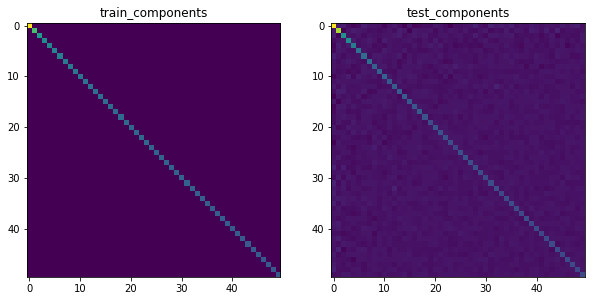

In [83]:
plt.subplots(1, 2, figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(np.cov(train_components.T))
plt.title('train_components')
plt.subplot(1,2,2)
plt.imshow(np.cov(test_components.T))
plt.title('test_components')
plt.show()

In [84]:
pca.components_.shape # V^T 的維度

(50, 1000)

### See how much (and how much percentage of) variance the principal components explain

In [85]:
print(pca.explained_variance_.shape)
print(pca.explained_variance_)

(50,)
[8.24925716 5.82871221 4.5241335  4.00264665 3.78444681 3.64296926
 3.57517101 3.3802236  3.34429111 3.29453717 3.19470413 3.13553815
 3.06887572 3.05359813 3.01053251 2.93280421 2.91604463 2.89726859
 2.87030689 2.86125544 2.80007278 2.77784784 2.74346563 2.72341814
 2.69817789 2.67174538 2.65828622 2.65637403 2.63606328 2.61351155
 2.59712544 2.59345478 2.57351146 2.544578   2.5408444  2.50878693
 2.50168154 2.4832909  2.47184379 2.45866003 2.44401104 2.42818392
 2.40065891 2.38176852 2.37562723 2.35765968 2.32975345 2.31907796
 2.31294245 2.3001842 ]


In [86]:
print(pca.explained_variance_ratio_.shape)
print(pca.explained_variance_ratio_)

(50,)
[0.00824519 0.00582584 0.0045219  0.00400067 0.00378258 0.00364117
 0.00357341 0.00337856 0.00334264 0.00329291 0.00319313 0.00313399
 0.00306736 0.00305209 0.00300905 0.00293136 0.00291461 0.00289584
 0.00286889 0.00285984 0.00279869 0.00277648 0.00274211 0.00272207
 0.00269685 0.00267043 0.00265697 0.00265506 0.00263476 0.00261222
 0.00259584 0.00259217 0.00257224 0.00254332 0.00253959 0.00250755
 0.00250045 0.00248207 0.00247062 0.00245745 0.0024428  0.00242699
 0.00239947 0.00238059 0.00237445 0.0023565  0.0023286  0.00231793
 0.0023118  0.00229905]


### Viz: plot proportion of variance explained with top principal components

For clear display, you may start with plotting <=20 principal components

In [87]:
def pca_explained_variance(n_col, variance, variance_ratio):
    pca_range = np.arange(n_col) + 1
    pca_names = ['PCA_%s' % i for i in pca_range]
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    plt.bar(pca_range, variance, align='center')
    xticks = plt.xticks(pca_range, pca_names, rotation=90)
    plt.ylabel('Variance Explanied')
    plt.subplot(1, 2, 2)
    plt.barh(pca_range, variance_ratio, align='center')
    yticks = plt.yticks(pca_range, pca_names)
    plt.xlabel('Proportion of Variance Explained')
    plt.show()

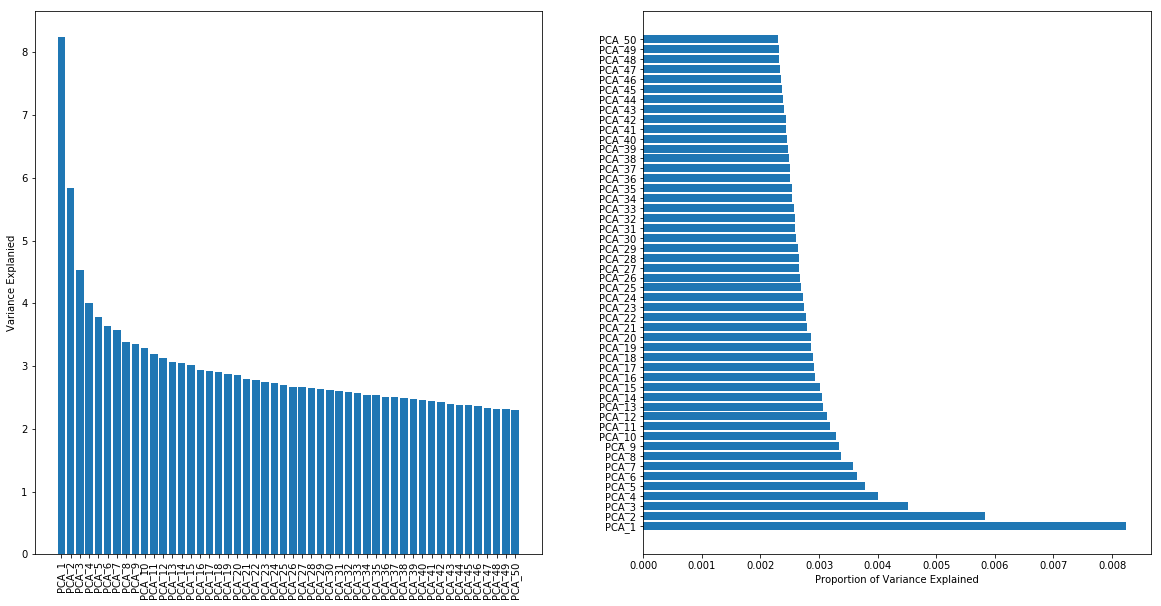

In [88]:
pca_explained_variance(50, pca.explained_variance_, pca.explained_variance_ratio_)

## Classifying positive/negative review with PCA preprocessing

In [89]:
print(X_train.shape, X_train_scaled.shape, y_train.shape)
print(train_components.shape)

(2026,) (2026, 1000) (2026,)
(2026, 50)


### Logistic Regression Classifier
#### Use standardized tf-idf vectors as features

In [90]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

#### scores

In [91]:
print(lr.score(X_train_scaled, y_train)) # 明顯的有 overfitting
print(lr.score(X_test_scaled, y_test))

0.9995064165844028
0.6950517836593786


#### Use (Stardardized + PCA) tf-idf vectors as features

In [92]:
lr2 = LogisticRegression()
lr2.fit(train_components, y_train)
print(lr2.score(train_components, y_train)) # overfitting 就沒那麼嚴重
print(lr2.score(test_components, y_test))

0.7936821322803553
0.7767548906789413


/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Q: What do you see from the training score and the test score? How do you compare the results from PCA and non-PCA preprocessing?

A: 沒有用 PCA 的時候 overfitting 很嚴重，有了 PCA 後 overfitting 比較不嚴重。因為沒有用 PCA 時，有 1000 個 features，數量太多，就很容易造成 overfitting，用了 PCA 後維度是 2026 x 50 只有 50 個 features 比較不會 overfitting

#### You can plot the coefficients against principal components

In [93]:
print(lr2.coef_.shape) # 是一個 1x50 的 array
lr2.coef_

(1, 50)


array([[-0.12727021, -0.47171303, -0.65927666, -0.01990675,  0.06457841,
        -0.10541167,  0.06861692,  0.19214004,  0.28920368,  0.30650399,
        -0.02039639,  0.14057175, -0.15990257, -0.01460075, -0.02820083,
        -0.03439452, -0.05346616, -0.00519461, -0.08516917,  0.03919543,
         0.0333638 ,  0.1075725 ,  0.06412894,  0.06387142,  0.00115313,
        -0.067049  , -0.02132472,  0.10295995, -0.05155201, -0.02797728,
        -0.0546801 , -0.05457536, -0.15292591,  0.04172614, -0.046793  ,
         0.00473192, -0.03775974, -0.01050922,  0.00588249, -0.05298801,
         0.02140391,  0.05451945,  0.04061025, -0.01024826,  0.0615473 ,
        -0.06841635, -0.02937411,  0.01795974, -0.05346477,  0.06162839]])

In [94]:
print(lr2.coef_.flatten().shape) # 是一個 50 個數的 vector
lr2.coef_.flatten()

(50,)


array([-0.12727021, -0.47171303, -0.65927666, -0.01990675,  0.06457841,
       -0.10541167,  0.06861692,  0.19214004,  0.28920368,  0.30650399,
       -0.02039639,  0.14057175, -0.15990257, -0.01460075, -0.02820083,
       -0.03439452, -0.05346616, -0.00519461, -0.08516917,  0.03919543,
        0.0333638 ,  0.1075725 ,  0.06412894,  0.06387142,  0.00115313,
       -0.067049  , -0.02132472,  0.10295995, -0.05155201, -0.02797728,
       -0.0546801 , -0.05457536, -0.15292591,  0.04172614, -0.046793  ,
        0.00473192, -0.03775974, -0.01050922,  0.00588249, -0.05298801,
        0.02140391,  0.05451945,  0.04061025, -0.01024826,  0.0615473 ,
       -0.06841635, -0.02937411,  0.01795974, -0.05346477,  0.06162839])

In [95]:
pca_range = np.arange(n_col) + 1
pca_names = ['PCA_%s' % i for i in pca_range]
pca_coef_pairs = zip(pca_names, lr2.coef_.flatten())
print(list(pca_coef_pairs))

[('PCA_1', -0.1272702084546948), ('PCA_2', -0.4717130345284707), ('PCA_3', -0.6592766578936093), ('PCA_4', -0.01990675105684504), ('PCA_5', 0.06457840507565472), ('PCA_6', -0.10541166938337816), ('PCA_7', 0.0686169237761722), ('PCA_8', 0.1921400395906356), ('PCA_9', 0.28920368200587004), ('PCA_10', 0.3065039891818324), ('PCA_11', -0.020396387377575487), ('PCA_12', 0.14057175325660315), ('PCA_13', -0.1599025681049713), ('PCA_14', -0.01460074667363082), ('PCA_15', -0.0282008254275372), ('PCA_16', -0.03439451846658972), ('PCA_17', -0.053466159703644385), ('PCA_18', -0.005194605933736644), ('PCA_19', -0.08516916924583563), ('PCA_20', 0.03919542949670049), ('PCA_21', 0.03336380148554486), ('PCA_22', 0.10757250049837755), ('PCA_23', 0.0641289386818185), ('PCA_24', 0.0638714218086222), ('PCA_25', 0.0011531268117913026), ('PCA_26', -0.06704899914144044), ('PCA_27', -0.021324721792514278), ('PCA_28', 0.10295994997683447), ('PCA_29', -0.05155200975879293), ('PCA_30', -0.027977277303590804), ('PC

In [96]:
# df_pca_coefs = pd.DataFrame(list(pca_coef_pairs), columns=['PCA', 'coefs'])

In [97]:
print(len(pca_names))
print(lr2.coef_.flatten().shape)
data_lr2 = {'PCA':pca_names, 'coefs':lr2.coef_.flatten().tolist()}
print(data_lr2)

50
(50,)
{'PCA': ['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7', 'PCA_8', 'PCA_9', 'PCA_10', 'PCA_11', 'PCA_12', 'PCA_13', 'PCA_14', 'PCA_15', 'PCA_16', 'PCA_17', 'PCA_18', 'PCA_19', 'PCA_20', 'PCA_21', 'PCA_22', 'PCA_23', 'PCA_24', 'PCA_25', 'PCA_26', 'PCA_27', 'PCA_28', 'PCA_29', 'PCA_30', 'PCA_31', 'PCA_32', 'PCA_33', 'PCA_34', 'PCA_35', 'PCA_36', 'PCA_37', 'PCA_38', 'PCA_39', 'PCA_40', 'PCA_41', 'PCA_42', 'PCA_43', 'PCA_44', 'PCA_45', 'PCA_46', 'PCA_47', 'PCA_48', 'PCA_49', 'PCA_50'], 'coefs': [-0.1272702084546948, -0.4717130345284707, -0.6592766578936093, -0.01990675105684504, 0.06457840507565472, -0.10541166938337816, 0.0686169237761722, 0.1921400395906356, 0.28920368200587004, 0.3065039891818324, -0.020396387377575487, 0.14057175325660315, -0.1599025681049713, -0.01460074667363082, -0.0282008254275372, -0.03439451846658972, -0.053466159703644385, -0.005194605933736644, -0.08516916924583563, 0.03919542949670049, 0.03336380148554486, 0.10757250049837755, 0.06412893

In [98]:
df_pca_coefs = pd.DataFrame(data_lr2)

In [99]:
df_pca_coefs.head()

,PCA,coefs
0,PCA_1,-0.127270
1,PCA_2,-0.471713
2,PCA_3,-0.659277
3,PCA_4,-0.019907
4,PCA_5,0.064578


排序一下，由大排到小

In [100]:
df_pca_coefs_sorted = df_pca_coefs.sort_values(by=['coefs'],ascending=False)

In [101]:
df_pca_coefs_sorted

,PCA,coefs
9,PCA_10,0.306504
8,PCA_9,0.289204
7,PCA_8,0.192140
11,PCA_12,0.140572
21,PCA_22,0.107573
27,PCA_28,0.102960
6,PCA_7,0.068617
4,PCA_5,0.064578
22,PCA_23,0.064129
23,PCA_24,0.063871


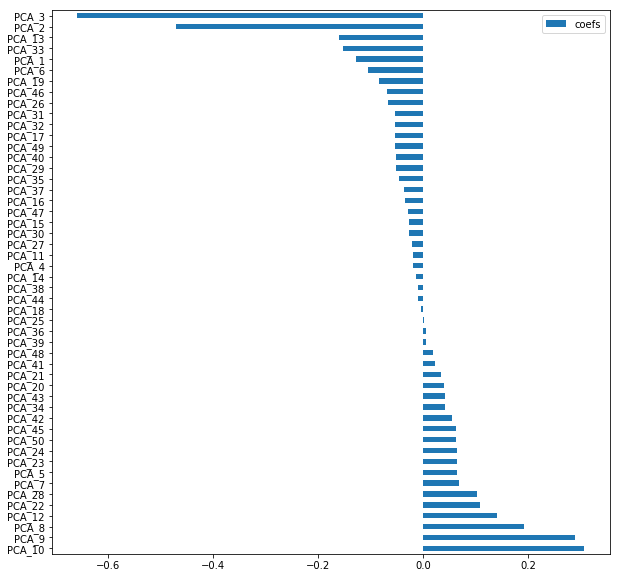

In [102]:
ax = df_pca_coefs_sorted.plot.barh(figsize=(10, 10))
ax.set_yticklabels(df_pca_coefs_sorted['PCA'])
plt.show()

### Random Forest Classifier

#### Use standardized tf-idf vectors as features

In [103]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=None, n_estimators=20, min_samples_leaf=3, random_state=42)
rf.fit(X_train_scaled, y_train)

print('Train score:', rf.score(X_train_scaled, y_train))
print('Test score:', rf.score(X_test_scaled, y_test))

Train score: 0.9486673247778875
Test score: 0.7341772151898734


#### Use (Stardardized + PCA) tf-idf vectors as features

In [104]:
rf2 = RandomForestClassifier(max_depth=None, n_estimators=20, min_samples_leaf=3, random_state=42)
rf2.fit(train_components, y_train)

print('Train score:', rf2.score(train_components, y_train))
print('Test score:', rf2.score(test_components, y_test))

Train score: 0.9861796643632774
Test score: 0.7249712313003452


#### Q: What do you see from the training result and the test result?

#### You can plot the feature importances against principal components

In [105]:
print(rf2.feature_importances_.shape)
rf2.feature_importances_ # 已經是一個 50 個數的 vector 了

(50,)


array([0.02166748, 0.11307109, 0.142967  , 0.015426  , 0.01196615,
       0.01721311, 0.01262101, 0.03400024, 0.02970498, 0.03726489,
       0.01075484, 0.01911284, 0.03271233, 0.01495024, 0.01693726,
       0.01531085, 0.01559399, 0.00983024, 0.01049695, 0.01394748,
       0.01361584, 0.01881271, 0.01875851, 0.01501064, 0.01365107,
       0.01594345, 0.01535116, 0.01338179, 0.01340683, 0.01336181,
       0.01245374, 0.01105351, 0.0145595 , 0.01005767, 0.01337624,
       0.01235688, 0.00986406, 0.01035989, 0.01322783, 0.01319657,
       0.01479568, 0.01289559, 0.01343434, 0.01643169, 0.00936317,
       0.01458225, 0.01395035, 0.0122667 , 0.01165993, 0.01327167])

In [106]:
data_rf = {'PCA':pca_names, 'Feature importances':rf2.feature_importances_.tolist()}
df_rf_coefs = pd.DataFrame(data_rf)
df_rf_coefs_sorted = df_rf_coefs.sort_values(by=['Feature importances'], ascending=False)
df_rf_coefs_sorted

,PCA,Feature importances
2,PCA_3,0.142967
1,PCA_2,0.113071
9,PCA_10,0.037265
7,PCA_8,0.034000
12,PCA_13,0.032712
8,PCA_9,0.029705
0,PCA_1,0.021667
11,PCA_12,0.019113
21,PCA_22,0.018813
22,PCA_23,0.018759


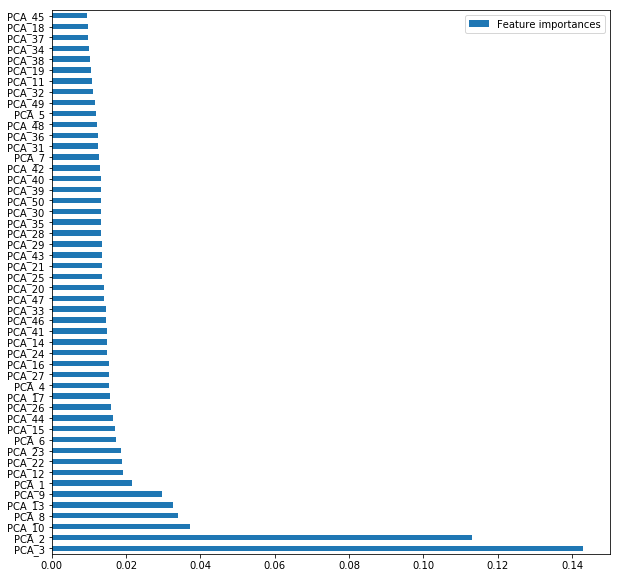

In [107]:
ax = df_rf_coefs_sorted.plot(kind='barh', figsize=(10,10))
ax.set_yticklabels(df_rf_coefs_sorted['PCA'])
plt.show()

## Extra Credit 

### 1. Can you cluster restaurants from their category information?

#### Hint: a business may have mutiple categories, e.g. a restaurant can have both "Restaurants" and "Korean"

In [ ]:
restaurant_mask = (df_business['categories'].str.contains('Restaurants') == True)
df_restaurants = df_business[restaurant_mask]

category_list = dict()
for row, value in df_restaurants['categories'].iteritems():
    for i in value.split(','):
        item = i.strip()
        if item not in category_list.keys():
            category_list[item] = 1
        else:
            category_list[item] += 1
# print(category_list)
print(len(category_list))

sorted_category_list = sorted(category_list.items(), key=lambda d: d[1], reverse=True)
print(sorted_category_list)

In [ ]:
X_res = df_restaurants['categories'].values
y_res = df_restaurants['stars'].values
X_res_train, X_res_test, y_res_train, y_res_test = train_test_split(X_res, y_res, test_size=0.5, random_state=42)
print(X_res.shape, X_res_train.shape, X_res_test.shape)
print(y_res.shape, y_res_train.shape, y_res_test.shape)

vectorized_res = TfidfVectorizer(stop_words='english', max_features=len(category_list))

vec_x_res_train = vectorized_res.fit_transform(X_res_train)
vec_x_res_test = vectorized_res.transform(X_res_test)
vec_x_res = vectorized_res.transform(X_res)
print(vec_x_res_train.shape, vec_x_res_test.shape, vec_x_res.shape)

vocab_res = vectorized_res.get_feature_names()

In [ ]:
vocab_res

### 2. Can you try different distance/similarity metrics for clusterings, e.g. Pearson correlation, Jaccard distance, etc.

#### Hint: You can take a look at scipy documentations to use other distances
#### Q: How do you compare with Cosine distance or Euclidean distance?

### 3. Can you cluster categories from business entities? What does it mean by a cluster?

### 4. What are the characteristics of each of the clustered ? For each cluster, which restaurant can best represent ("define") its cluster?

#### Hint: how to interpret "best"?

### 5. Can you think of other use cases that clustering can be used?

#### Hint: of course you can make use of other yelp dataset. You can try anything you want as long as you can explain it.